In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feature engineering/pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# feature and model selction
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

# model evaluation
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# other
import time

In [211]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# EDA

In [212]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Dataset contains 2 days worth of transactions.

In [213]:
seconds = df['Time'].max() 
seconds

172792.0

In [214]:
df.shape

(284807, 31)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

There are no null entries in dataset

In [216]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class is highly imbalanced. Only 492 fradulent transactions, whereas we have over 284k non-fraudelent transcations.

In [217]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [218]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [219]:
df.groupby('Class')['Amount'].agg(['mean', 'median', 'std'])

,mean,median,std
Class,,,
0,88.291022,22.00,250.105092
1,122.211321,9.25,256.683288


### Splitting dataset into fraud vs. legit

In [220]:
legit = df[df['Class'] == 0]
legit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [221]:
fraud = df[df['Class'] == 1]
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [222]:
legit['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [223]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [224]:
print(f'Median legit transcation amount: {legit.Amount.median()} Euros')
print(f'Median fraud transcation amount: {fraud.Amount.median()} Euros')

Median legit transcation amount: 22.0 Euros
Median fraud transcation amount: 9.25 Euros


In [225]:
df.groupby('Class').agg(['mean', 'median'])

Time                 V1                  V2            \
               mean   median      mean    median      mean    median   
Class                                                                  
0      94838.202258  84711.0  0.008258  0.020023 -0.006271  0.064070   
1      80746.806911  75568.5 -4.771948 -2.342497  3.623778  2.717869   

             V3                  V4            ...       V25            \
           mean    median      mean    median  ...      mean    median   
Class                                          ...                       
0      0.012171  0.182158 -0.007860 -0.022405  ... -0.000072  0.016417   
1     -7.033281 -5.075257  4.542029  4.177147  ...  0.041449  0.088371   

            V26                 V27                 V28                Amount  \
           mean    median      mean    median      mean    median        mean   
Class                                                                           
0     -0.000089 -0.052227 -0.000295  0.001230 -0.000131  0.011199   88.291022   
1      0.051648  0.004321  0.170575  0.394926  0.075667  0.146344  122.211321   

              
      median  
Class         
0      22.00  
1       9.25  

[2 rows x 60 columns]

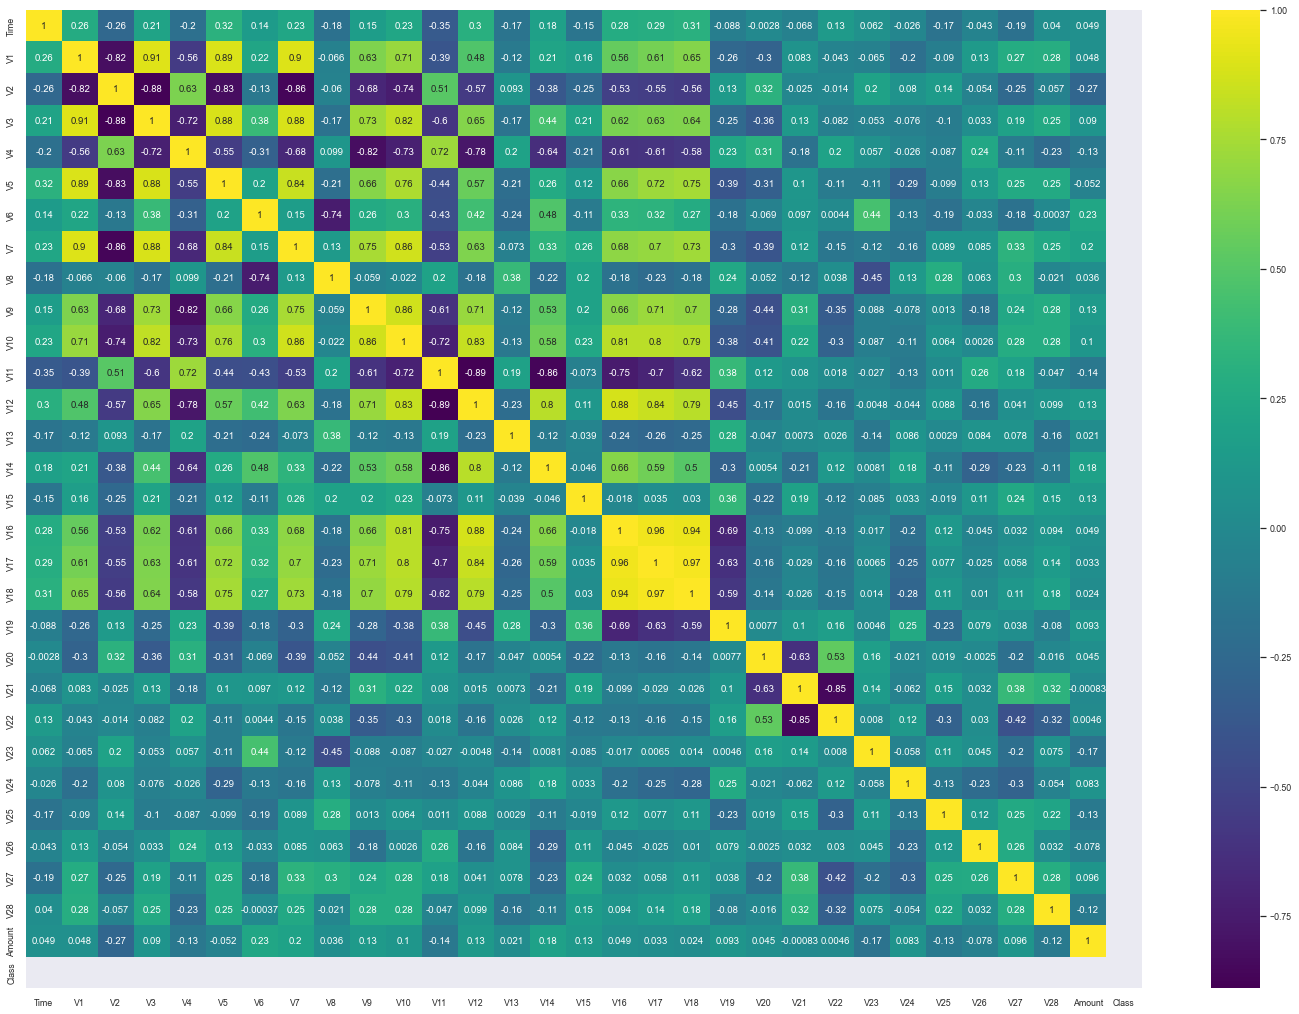

In [238]:
plt.figure(figsize =(25,18))
sns.set(font_scale=0.8)
sns.heatmap(fraud.corr(), cmap ='viridis', annot=True)
plt.show()

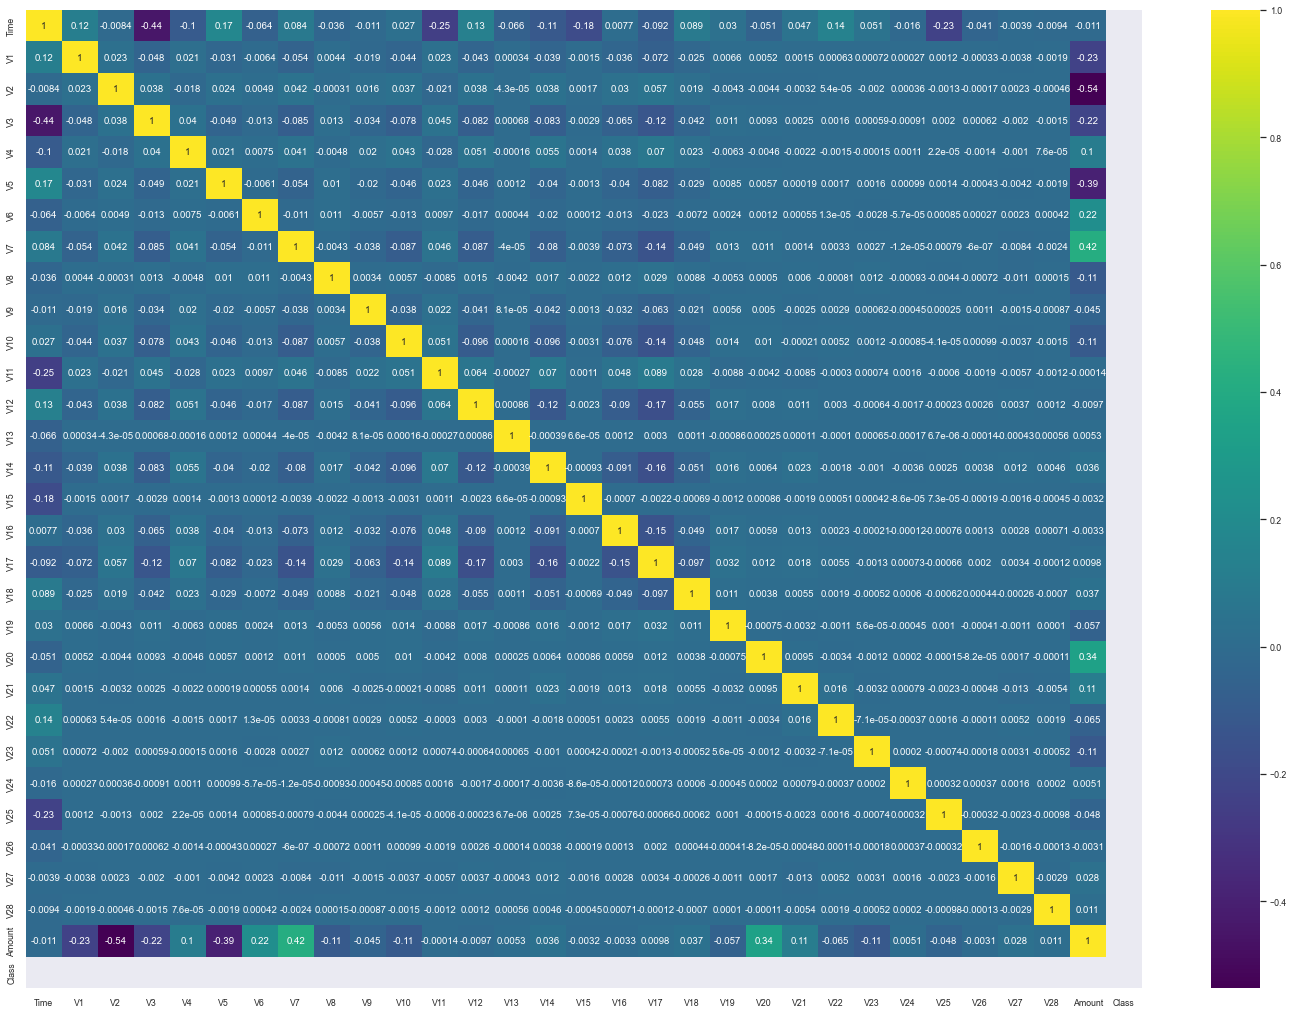

In [240]:
plt.figure(figsize =(25,18))
sns.set(font_scale=0.8)
sns.heatmap(legit.corr(), cmap ='viridis', annot=True)
plt.show()

## Undersampling

Here, we create a balanced dataset.

In [144]:
balanced_df = pd.concat([legit.sample(492), fraud], axis=0)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
175318,122280.0,1.730202,-1.563927,-1.063731,-0.347998,-0.736703,0.505852,-0.726852,0.216021,0.229274,...,-0.649830,-1.779354,0.314744,-0.107616,-0.595928,-0.772690,-0.000638,-0.010111,199.38,0
123636,77005.0,1.236293,0.564068,-0.726321,0.868267,0.873469,0.274273,0.115374,0.096016,-0.318521,...,-0.045384,-0.037935,-0.250803,-1.248159,0.756358,-0.244070,0.045345,0.026579,1.00,0
65657,51692.0,0.814778,-0.747326,-0.165416,-0.636010,-0.522910,0.066878,-0.312485,0.288052,1.417026,...,0.125045,0.237437,-0.203237,-0.386323,0.403611,-0.597083,0.078375,0.061641,165.33,0
141248,84201.0,-0.669795,0.517229,2.660893,-0.700499,0.106632,-0.217912,0.645198,-0.316164,0.647089,...,0.243878,0.978007,-0.353375,0.030599,-0.149554,-0.663270,-0.298264,-0.304071,19.95,0
114872,73653.0,1.202274,0.478789,0.370272,2.186503,0.199835,0.238360,-0.036739,0.117281,-0.838093,...,-0.081831,-0.342832,-0.085609,-0.540839,0.480827,-0.037933,-0.017742,0.004784,4.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [145]:
balanced_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [146]:
balanced_df.groupby('Class').agg(['mean', 'median'])

Time                 V1                  V2            \
               mean   median      mean    median      mean    median   
Class                                                                  
0      89499.737805  78255.0  0.039380  0.054658  0.030326  0.135420   
1      80746.806911  75568.5 -4.771948 -2.342497  3.623778  2.717869   

             V3                  V4            ...       V25            \
           mean    median      mean    median  ...      mean    median   
Class                                          ...                       
0      0.093617  0.296415 -0.081762 -0.108082  ...  0.001886  0.057619   
1     -7.033281 -5.075257  4.542029  4.177147  ...  0.041449  0.088371   

            V26                 V27                 V28                Amount  \
           mean    median      mean    median      mean    median        mean   
Class                                                                           
0      0.002932 -0.042710 -0.024072  0.001888 -0.002411  0.011647   75.125244   
1      0.051648  0.004321  0.170575  0.394926  0.075667  0.146344  122.211321   

              
      median  
Class         
0      17.83  
1       9.25  

[2 rows x 60 columns]

# PCA

In [317]:
pca = PCA(n_components=10)

In [318]:
PCA_df = pca.fit_transform(balanced_df.drop('Class', axis=1))

In [319]:
pca.explained_variance_ratio_

array([9.99976833e-01, 2.30300358e-05, 9.27885964e-08, 1.42577085e-08,
       1.05968388e-08, 5.12714164e-09, 4.52660613e-09, 1.58796235e-09,
       1.07460589e-09, 9.39341586e-10])

We can see that 99% of the variance is captured by the first principal component.

In [321]:
PCA_df = pd.DataFrame(PCA_df)
PCA_df

,0,1,2,3,4,5,6,7,8,9
0,37156.739866,96.320054,-6.973354,0.919068,-1.329547,-1.360763,0.017024,-0.714235,1.330989,1.686843
1,-8118.283183,-96.711549,-9.839260,0.587465,-0.534946,0.925341,-0.523571,-0.611070,0.087058,0.680463
2,-33431.263517,70.616499,-11.662541,1.297181,-0.552976,0.258032,-0.359150,-0.330175,2.555311,-0.286425
3,-922.281005,-78.609187,-10.015268,0.846553,-0.467202,-2.082090,0.111849,0.073711,-0.621350,-2.307442
4,-11470.282738,-92.742317,-10.240070,0.841604,-0.706288,-0.642657,-0.590502,-0.630368,-1.864901,1.785600
...,...,...,...,...,...,...,...,...,...,...
979,84018.761148,281.396747,8.199347,-3.763989,1.274768,0.846075,0.039953,-0.630269,1.241597,-2.329010
980,84223.715379,-107.873391,4.582828,-3.639879,0.974506,0.898596,-0.133589,-1.030499,1.903936,0.474247
981,84227.724451,-30.738632,4.520646,-2.575660,-0.268442,-2.262046,0.524263,-0.803735,0.868946,-0.911189
982,84842.743951,136.300120,8.839952,-3.360781,0.067856,0.867947,0.324757,1.469164,1.772526,-1.605405


# Machine Learning Pipeline

In [331]:
def detection_pipeline(data, model):
    
    df = data
    X = data.drop('Class', axis=1)
    y = data['Class']

    amount_pipe = Pipeline([
        ('std-by-pclass', StandardScaler())
    ])

    # preprocessor
    prepoc = ColumnTransformer([
        ('transform-amount', amount_pipe, ['Amount'])
    ], remainder='passthrough')
    
    pl = Pipeline([
        #('std', StandardScaler()),
        ('preprocessor', prepoc),
        #('feature-selection', SelectKBest(chi2, k=10)),
        ('clf', model)
    ])

    return pl

# Model Selection and Evaluation

In [332]:
# "name: model" dictionary

classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVC": LinearSVC(random_state=0, max_iter=3000, dual=False),
    "RBF SVM": SVC(),
    "Gaussian Process": GaussianProcessClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Neural Net": MLPClassifier(random_state=0),
    "AdaBoost": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=0),
    "Extra Trees": ExtraTreesClassifier(),
    "XGBoost": XGBClassifier()
}

# "name: hyperparameters" dictionary
clf_hyperparameters = {
    "Nearest Neighbors": {
        'clf__n_neighbors': list(range(2, 11)),
        'clf__weights': ['uniform', 'distance']
    },
    "Linear SVC": {
        'clf__C': [0.3, 0.7, 1, 10, 50, 100],#[0.1, 0.3, 0.7, 1],
        'clf__tol': [1e-5, 1e-3, 1e-1]
    },
    "RBF SVM":  {
        'clf__C': [0.1, 0.3, 0.7, 1],
        'clf__gamma': ['scale', 'auto', 2]
    },
    "Gaussian Process": {},
    "Decision Tree": {
        'clf__max_depth': list(range(3, 10)), 
        'clf__min_samples_split': [2, 5, 10],
        'clf__criterion': ['gini', 'entropy']
    },
    "Random Forest": {
        'clf__n_estimators': [10, 100],
        'clf__max_depth': list(range(3, 10)),
        'clf__criterion': ['gini', 'entropy']
    },
    "Neural Net":  {
        'clf__max_iter': [1500, 2000],
        'clf__hidden_layer_sizes': [(2,),(3,),(4,),(5,)],
        'clf__activation': ['relu'],
        'clf__learning_rate': ['constant','adaptive'],
    },
    "AdaBoost":  {
        'clf__n_estimators': [50, 30, 70],
        'clf__learning_rate': [1, 0.5, 0.1, 0.01]
    },
    "Naive Bayes":  {
        'clf__var_smoothing': np.logspace(0,-9, num=100)
    },
    "Logistic Regression":  {
        'clf__C':[1, 10, 100],
        'clf__max_iter': [1000, 2000, 4000]
    },
    "Extra Trees": {
        'clf__criterion': ['gini', 'entropy'],
        'clf__n_estimators': [75, 100, 250],
        'clf__min_samples_leaf': [1, 2, 5, 10],
        'clf__max_depth': [2, 4, 5, 6, 7]
    },
    "XGBoost": {
        'clf__n_estimators': [100,250,500],
        'clf__max_depth': [3,5,7]
    }
}

In [333]:
# create lists
params = []
train_acc = []
test_acc = []
F1_scores = []
recall_scores = []

# create train-test split
X_train, X_test, y_train, y_test = train_test_split(balanced_df.drop('Class', axis=1), balanced_df['Class'], test_size=0.2)

# create train-test split for PCA dataset
# X_train, X_test, y_train, y_test = train_test_split(PCA_df, balanced_df['Class'], test_size=0.2)


# iterate through all models and perform grid search
for name, model in classifiers.items():
          
    pipeline = detection_pipeline(balanced_df, model)
    
    start = time.time()
    
    searcher = GridSearchCV(pipeline, param_grid=clf_hyperparameters[name], error_score='raise')
    searcher.fit(X_train, y_train)

    params.append(searcher.best_params_)
    train_acc.append(searcher.score(X_train, y_train))
    test_acc.append(searcher.score(X_test, y_test))
    F1_scores.append(f1_score(y_test, searcher.predict(X_test), average=None))
    recall_scores.append(recall_score(searcher.predict(X_test), y_test, average=None))
    
    end = time.time()
    
    print(f'*** {name}: ***')
    print('parameter tuning complete')
    print(f'tuning time: {end-start} seconds')

*** Nearest Neighbors: ***
parameter tuning complete
tuning time: 1.6921727657318115 seconds
*** Linear SVC: ***
parameter tuning complete
tuning time: 1.4263279438018799 seconds
*** RBF SVM: ***
parameter tuning complete
tuning time: 3.3153810501098633 seconds
*** Gaussian Process: ***
parameter tuning complete
tuning time: 1.0240681171417236 seconds
*** Decision Tree: ***
parameter tuning complete
tuning time: 4.1032798290252686 seconds
*** Random Forest: ***
parameter tuning complete
tuning time: 23.121994018554688 seconds
*** Neural Net: ***
parameter tuning complete
tuning time: 7.344022989273071 seconds
*** AdaBoost: ***
parameter tuning complete
tuning time: 13.333812952041626 seconds
*** Naive Bayes: ***
parameter tuning complete
tuning time: 6.014180898666382 seconds
*** Logistic Regression: ***
parameter tuning complete
tuning time: 1.616157054901123 seconds
*** Extra Trees: ***
parameter tuning complete
tuning time: 121.71529483795166 seconds
*** XGBoost: ***
parameter tunin

In [334]:
# create classifier comparison dataframe
clfs = pd.DataFrame()
clfs['Name'] = list(classifiers.keys())
clfs['Model'] = list(classifiers.values())
clfs['Best Hyperparameters'] = params
clfs['Training Accuracy'] = train_acc
clfs['Testing Accuracy'] = test_acc
clfs['F1 Score'] = F1_scores
clfs['Recall'] = recall_scores

clfs = clfs.set_index('Name').sort_values(by='Testing Accuracy', ascending=False)
clfs

,Model,Best Hyperparameters,Training Accuracy,Testing Accuracy,F1 Score,Recall
Name,,,,,,
Random Forest,RandomForestClassifier(),"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.991105,0.964467,"[0.9655172413793104, 0.9633507853403142]","[0.9423076923076923, 0.989247311827957]"
Linear SVC,"LinearSVC(dual=False, max_iter=3000, random_st...","{'clf__C': 0.7, 'clf__tol': 1e-05}",0.954257,0.959391,"[0.9603960396039605, 0.9583333333333333]","[0.941747572815534, 0.9787234042553191]"
AdaBoost,AdaBoostClassifier(),"{'clf__learning_rate': 1, 'clf__n_estimators':...",0.961881,0.959391,"[0.9595959595959596, 0.9591836734693877]","[0.9595959595959596, 0.9591836734693877]"
XGBoost,"XGBClassifier(base_score=None, booster=None, c...","{'clf__max_depth': 3, 'clf__n_estimators': 100}",1.000000,0.959391,"[0.96, 0.9587628865979382]","[0.9504950495049505, 0.96875]"
Logistic Regression,LogisticRegression(random_state=0),"{'clf__C': 100, 'clf__max_iter': 1000}",0.947903,0.954315,"[0.9547738693467336, 0.9538461538461539]","[0.95, 0.9587628865979382]"
Decision Tree,DecisionTreeClassifier(),"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.937738,0.949239,"[0.9514563106796117, 0.946808510638298]","[0.9158878504672897, 0.9888888888888889]"
Extra Trees,ExtraTreesClassifier(),"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.936468,0.928934,"[0.9333333333333333, 0.9239130434782609]","[0.8828828828828829, 0.9883720930232558]"
Naive Bayes,GaussianNB(),{'clf__var_smoothing': 1e-09},0.869123,0.883249,"[0.8949771689497718, 0.8685714285714285]","[0.8166666666666667, 0.987012987012987]"
Neural Net,MLPClassifier(random_state=0),"{'clf__activation': 'relu', 'clf__hidden_layer...",0.808132,0.807107,"[0.8347826086956521, 0.7682926829268294]","[0.732824427480916, 0.9545454545454546]"
